In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

##**Reading the Dataset**

In [ ]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset from the specified path
file_path = '/content/drive/MyDrive/Coffee Sales Analysis/Coffee Shop Sales.xlsx'
df = pd.read_excel(file_path, sheet_name='Transactions')

# Display the dataframe
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
# Checking the no of duplicate values
value = len(df[df.duplicated()])
value

0

In [ ]:
# Check for missing values
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
# Descriptive statistics
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [ ]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

**Feture Engineering**

In [ ]:
# Convert date columns to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

# Extract hour from 'transaction_time' and day of the week and month 'transaction_date'
df['transaction_hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour
df['day_of_week'] = df['transaction_date'].dt.day_name()
df['month'] = df['transaction_date'].dt.month_name()

# Function to extract and convert size from product_detail and remove size abbreviations
def extract_and_clean_size(detail):
    match = re.search(r'\b(Rg|Lg|Sm)\b', detail)
    size = 'Unknown'
    if match:
        size_abbr = match.group(0)
        if size_abbr == 'Rg':
            size = 'Regular'
        elif size_abbr == 'Lg':
            size = 'Large'
        elif size_abbr == 'Sm':
            size = 'Small'
        # Remove the matched size abbreviation from product detail
        detail = re.sub(r'\b(Rg|Lg|Sm)\b', '', detail).strip()
    return size, detail

# Apply the extract_and_clean_size function to the 'product_detail' column
df[['size', 'product_detail']] = df['product_detail'].apply(lambda x: pd.Series(extract_and_clean_size(x)))

In [ ]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_hour,day_of_week,month,size
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia,7,Sunday,January,Regular
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai,7,Sunday,January,Large
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate,7,Sunday,January,Large
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,7,Sunday,January,Small
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai,7,Sunday,January,Large


In [ ]:
# Check for missing values
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
transaction_hour    0
day_of_week         0
month               0
size                0
dtype: int64


In [ ]:
# Filling null values in the 'size' column with 'Unknown'
df['size'].fillna('Unknown', inplace=True)

In [ ]:
# Check for missing values
print(df.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
transaction_hour    0
day_of_week         0
month               0
size                0
dtype: int64


In [ ]:
# # extracting the data (df) to download

# from google.colab import files

# df.to_csv('coffee_sales.csv', index=False)
# files.download('coffee_sales.csv')

# **Exploratory Data Analysis**

In [ ]:
# Calculate total revenue
df['total_revenue'] = df['transaction_qty'] * df['unit_price']

In [ ]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_hour,day_of_week,month,size,total_revenue
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia,7,Sunday,January,Regular,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai,7,Sunday,January,Large,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate,7,Sunday,January,Large,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,7,Sunday,January,Small,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai,7,Sunday,January,Large,6.2


**1. Total Orders**

In [ ]:
# Total Orders
total_orders = df['transaction_id'].nunique()
print(f"Total Orders: {total_orders}")

Total Orders: 149116


**2. Total Quantity Sold**

In [ ]:
# Total Quantity Sold
total_quantity_sold = df['transaction_qty'].sum()
print(f"Total Quantity Sold: {total_quantity_sold}")

Total Quantity Sold: 214470


**3. Total Revenue**

In [ ]:
# Total Revenue
total_revenue = df['total_revenue'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $698812.33


**4. Average Order Value**

In [ ]:
# Average Order Value
average_order_value = total_revenue / total_orders
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $4.69


**5. Total Revenue by each date**

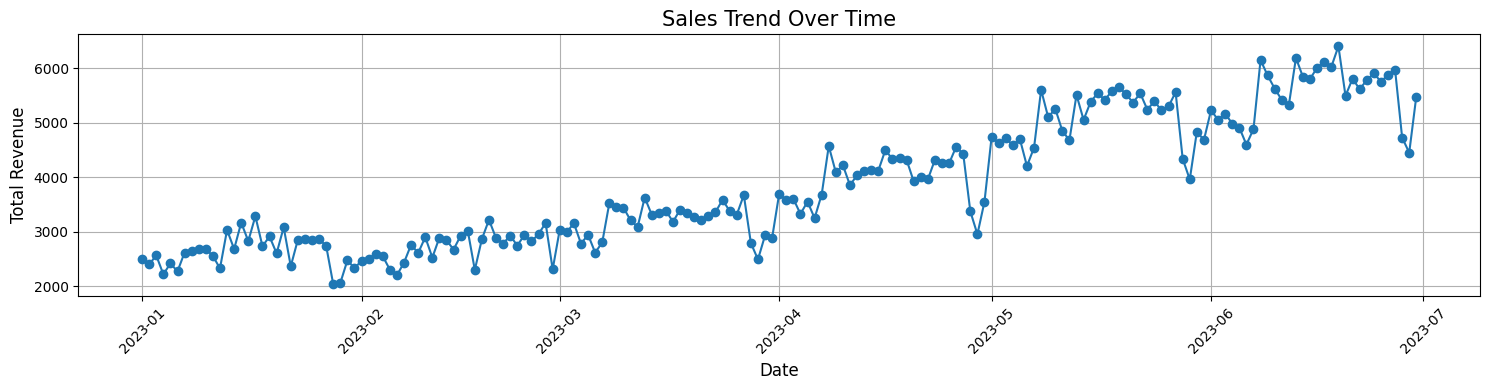

In [ ]:
# Calculate total revenue for each date
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
sales_trend = df.groupby('transaction_date')['total_revenue'].sum().reset_index()
# print(sales_trend.head(15))

# Plot the sales trend over time
plt.figure(figsize=(15, 4))
plt.plot(sales_trend['transaction_date'], sales_trend['total_revenue'], marker='o')
plt.title('Sales Trend Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**6. Total revenue for each hour**

    transaction_hour  total_revenue
0                  6       21900.27
1                  7       63526.47
2                  8       82699.87
3                  9       85169.53
4                 10       88673.39
5                 11       46319.14
6                 12       40192.79
7                 13       40367.45
8                 14       41304.74
9                 15       41733.10
10                16       41122.75
11                17       40134.31
12                18       34286.20
13                19       28446.68
14                20        2935.64


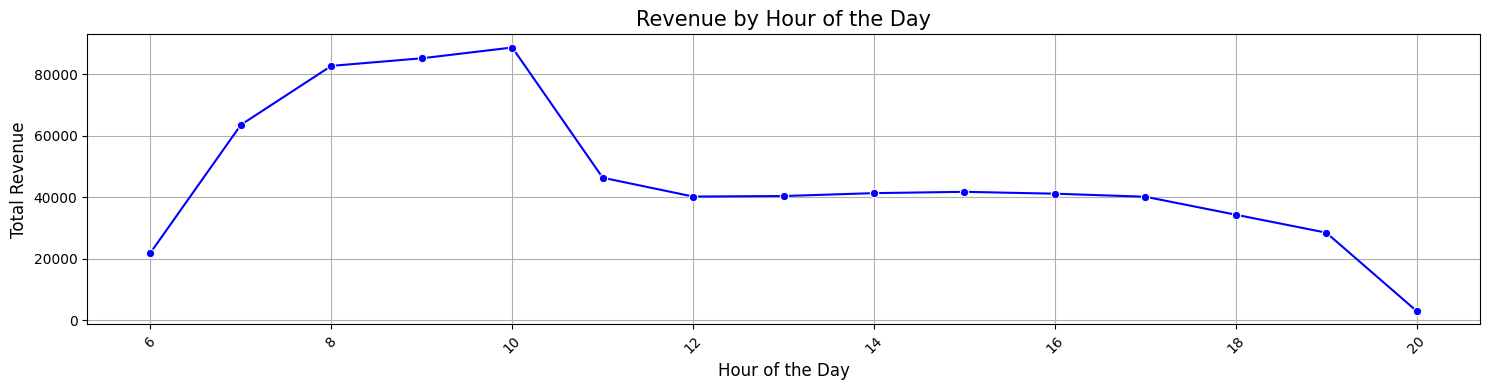

In [ ]:
# Calculate total revenue for each hour
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
hourly_revenue = df.groupby('transaction_hour')['total_revenue'].sum().reset_index()
hourly_revenue.columns = ['transaction_hour', 'total_revenue']
print(hourly_revenue)

# Create the line plot
plt.figure(figsize=(15, 4))
sns.lineplot(x='transaction_hour', y='total_revenue', data=hourly_revenue, marker='o', color='blue')
plt.title('Revenue by Hour of the Day', fontsize=15)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**7. Sales by Day of the Week**

  day_of_week  total_revenue
0      Monday      101677.28
1     Tuesday       99455.94
2   Wednesday      100313.54
3    Thursday      100767.78
4      Friday      101373.00
5    Saturday       96894.48
6      Sunday       98330.31


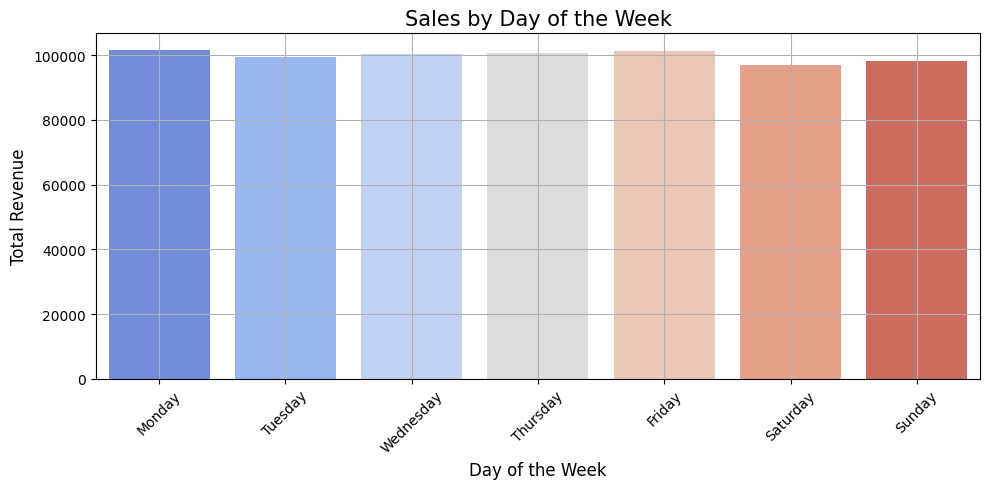

In [ ]:
# Calculate total revenue for each day of the week
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
sales_by_day = df.groupby('day_of_week')['total_revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
print(sales_by_day)

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='total_revenue', data=sales_by_day, palette='coolwarm')
plt.title('Sales by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**8. Sales by Weekday vs. Weekend**

Total Sales on Weekdays: $503587.54
Total Sales on Weekends: $195224.79


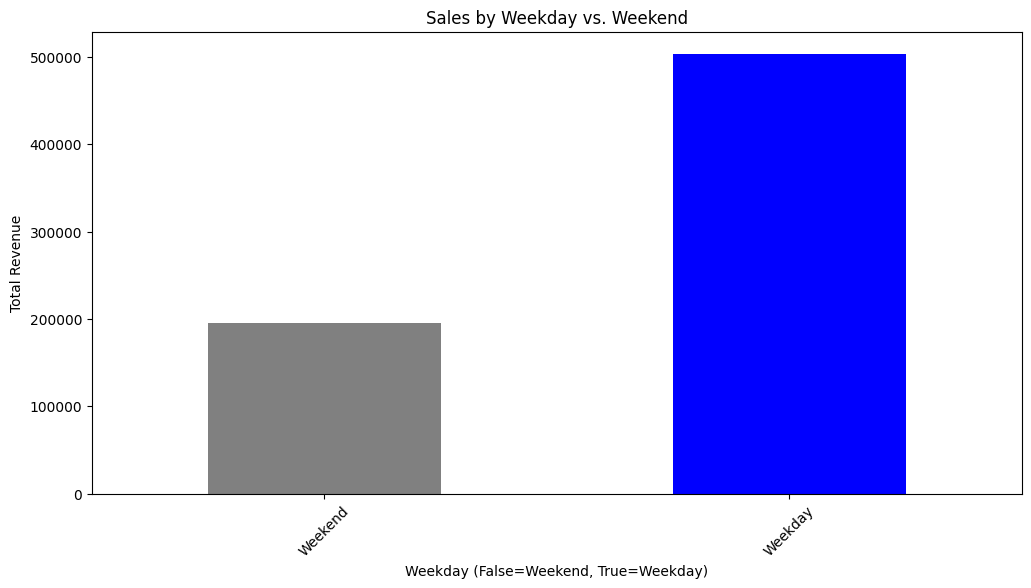

In [ ]:
# Sales by Weekday vs. Weekend
df['weekday'] = df['transaction_date'].dt.weekday < 5
sales_by_weekday = df.groupby('weekday')['total_revenue'].sum()
plt.figure(figsize=(12, 6))
sales_by_weekday.plot(kind='bar', color=['grey', 'blue'], legend=False)
plt.title('Sales by Weekday vs. Weekend')
plt.xlabel('Weekday (False=Weekend, True=Weekday)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.xticks([0, 1], ['Weekend', 'Weekday'])

# Print total sales on weekdays and weekends
total_sales_weekday = sales_by_weekday[True]
total_sales_weekend = sales_by_weekday[False]
print(f'Total Sales on Weekdays: ${total_sales_weekday:.2f}')
print(f'Total Sales on Weekends: ${total_sales_weekend:.2f}')

plt.show()

**9. Sales by Product Size**

size
Large      237958.15
Regular    199761.35
Small       46402.70
Unknown    214690.13
Name: total_revenue, dtype: float64


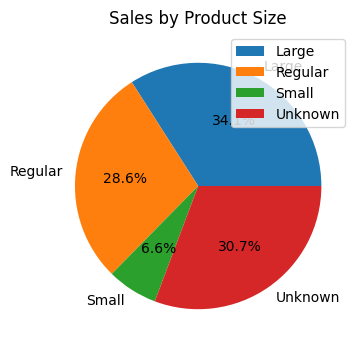

In [ ]:
# Sales by Product Size
sales_by_size = df.groupby('size')['total_revenue'].sum()
print(sales_by_size)

plt.figure(figsize=(8, 4))
sales_by_size.plot(kind='pie', autopct='%1.1f%%', legend=True)
plt.title('Sales by Product Size')
plt.ylabel('')  # Remove the ylabel
plt.show()

**10. Sales by Store Location**

store_location
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: total_revenue, dtype: float64


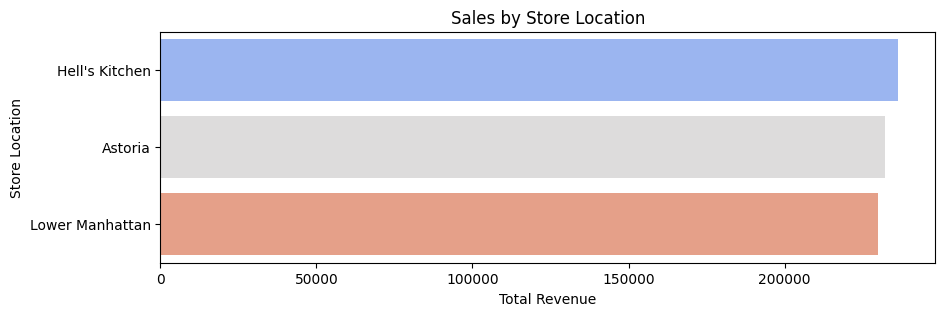

In [ ]:
# Sales by Store Location
sales_by_location = df.groupby('store_location')['total_revenue'].sum().nlargest(3)
print(sales_by_location)

plt.figure(figsize=(10, 3))
sns.barplot(y=sales_by_location.index, x=sales_by_location.values, palette='coolwarm')
plt.title('Sales by Store Location')
plt.xlabel('Total Revenue')
plt.ylabel('Store Location')
plt.show()

**11. Sales by Product Category**

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: total_revenue, dtype: float64


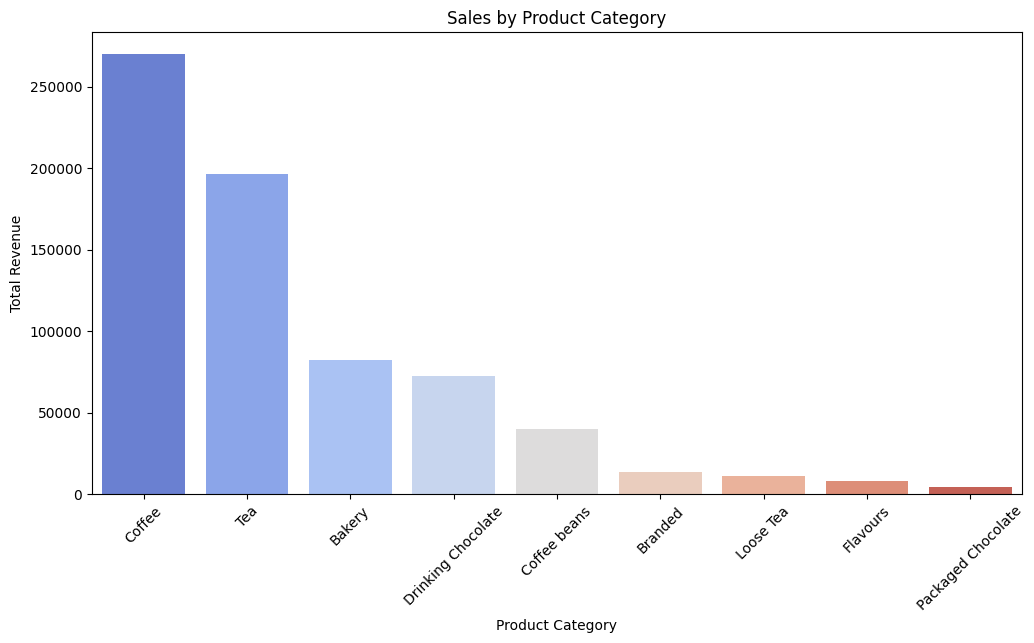

In [ ]:
# Sales by Product Category
sales_by_category = df.groupby('product_category')['total_revenue'].sum().nlargest(10)
print(sales_by_category)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='coolwarm')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**12. Top 10 Selling Products**

product_type
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Brewed herbal tea        47539.50
Premium brewed coffee    38781.15
Organic brewed coffee    37746.50
Scone                    36866.12
Drip coffee              31984.00
Name: total_revenue, dtype: float64


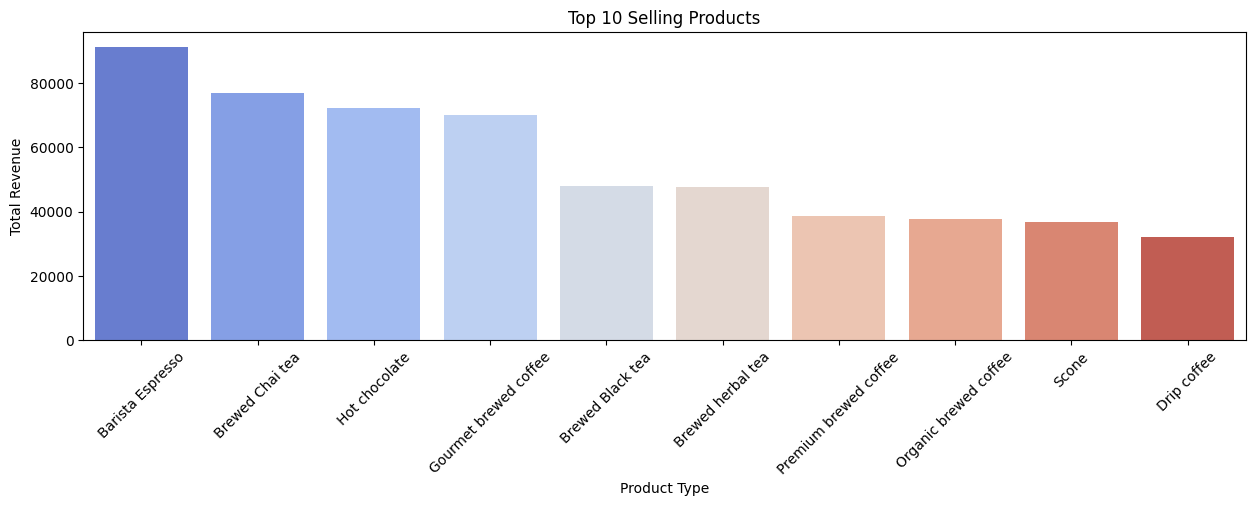

In [ ]:
# Top 10 Selling Products
top_10_products = df.groupby('product_type')['total_revenue'].sum().nlargest(10)
print(top_10_products)

plt.figure(figsize=(15, 4))
sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='coolwarm')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**13. Sales by Top 10 Product Details**

product_detail
Ethiopia                     42304.10
Sustainably Grown Organic    39065.10
Jamaican Coffee River        38781.15
Brazilian                    37746.50
Latte                        36369.75
Dark chocolate               35785.70
Our Old Time Diner Blend     35278.00
Columbian Medium Roast       34528.50
Cappuccino                   33639.25
Morning Sunrise Chai         30587.50
Name: total_revenue, dtype: float64


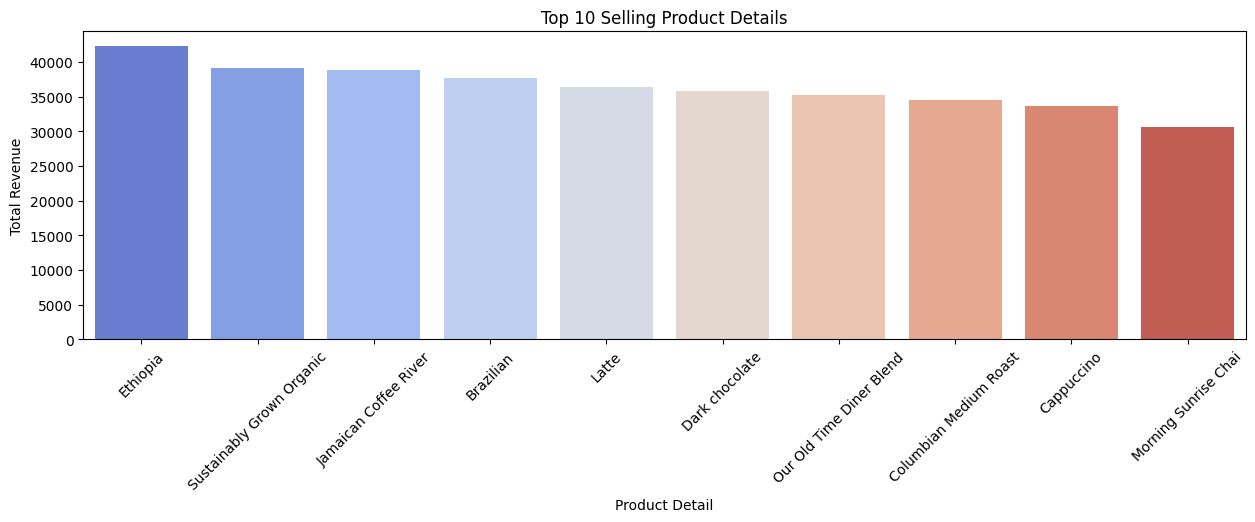

In [ ]:
# Sales by Top 10 Product Details
top_10_product_details = df.groupby('product_detail')['total_revenue'].sum().nlargest(10)
print(top_10_product_details)

plt.figure(figsize=(15, 4))
sns.barplot(x=top_10_product_details.index, y=top_10_product_details.values, palette='coolwarm')
plt.title('Top 10 Selling Product Details')
plt.xlabel('Product Detail')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**14. Sales by Store Location and Size**

     store_location     size  counts
0           Astoria    Large   16136
1           Astoria  Regular   16443
2           Astoria    Small    5042
3           Astoria  Unknown   12978
4    Hell's Kitchen    Large   15060
5    Hell's Kitchen  Regular   15294
6    Hell's Kitchen    Small    4605
7    Hell's Kitchen  Unknown   15776
8   Lower Manhattan    Large   13689
9   Lower Manhattan  Regular   14052
10  Lower Manhattan    Small    4277
11  Lower Manhattan  Unknown   15764


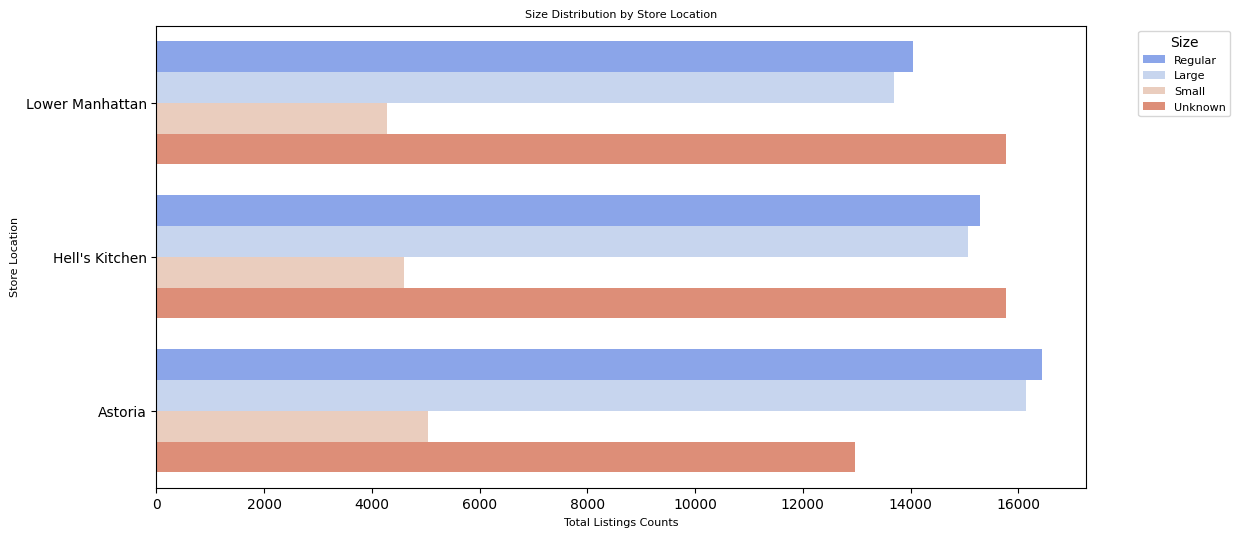

In [ ]:
# Group by 'store_location' and 'size', then calculate the count of listings
store_size_counts = df.groupby(['store_location', 'size']).size().reset_index(name='counts')
print(store_size_counts)

# Create a horizontal bar plot of size distribution by store location
plt.figure(figsize=(12, 6))
sns.countplot(y='store_location', hue='size', data=df, palette='coolwarm')
plt.title('Size Distribution by Store Location', fontsize=8)
plt.xlabel('Total Listings Counts', fontsize=8)
plt.ylabel('Store Location', fontsize=8)
plt.legend(title='Size', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

**15. Sales by Store Location on Weekends vs. Weekdays**

    store_location  weekday  counts
0          Astoria    False   14015
1          Astoria     True   36584
2   Hell's Kitchen    False   14190
3   Hell's Kitchen     True   36545
4  Lower Manhattan    False   13401
5  Lower Manhattan     True   34381


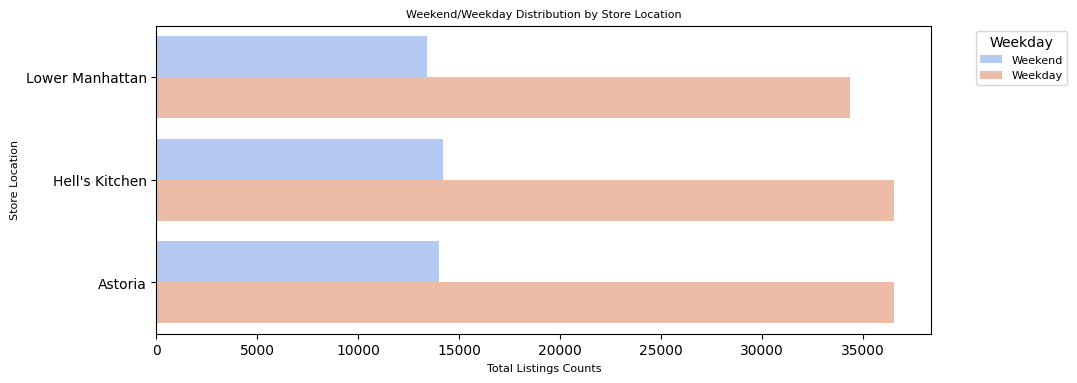

In [ ]:
# Group by 'store_location' and 'weekday', then calculate the count of listings
store_weekday_counts = df.groupby(['store_location', 'weekday']).size().reset_index(name='counts')
print(store_weekday_counts)

# Create a horizontal bar plot of weekend/weekday distribution by store location
plt.figure(figsize=(10, 4))
sns.countplot(y='store_location', hue='weekday', data=df, palette='coolwarm')
plt.title('Weekend/Weekday Distribution by Store Location', fontsize=8)
plt.xlabel('Total Listings Counts', fontsize=8)
plt.ylabel('Store Location', fontsize=8)
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, labels=['Weekend', 'Weekday'])
plt.show()

**16. Sales by Store Location and Product Category**

     store_location    product_category  counts
0           Astoria              Bakery    7289
1           Astoria             Branded     279
2           Astoria              Coffee   20025
3           Astoria        Coffee beans     502
4           Astoria  Drinking Chocolate    4300
5           Astoria            Flavours    1490
6           Astoria           Loose Tea     344
7           Astoria  Packaged Chocolate     110
8           Astoria                 Tea   16260
9    Hell's Kitchen              Bakery    7617
10   Hell's Kitchen             Branded     119
11   Hell's Kitchen              Coffee   20187
12   Hell's Kitchen        Coffee beans     720
13   Hell's Kitchen  Drinking Chocolate    3763
14   Hell's Kitchen            Flavours    2370
15   Hell's Kitchen           Loose Tea     485
16   Hell's Kitchen  Packaged Chocolate     197
17   Hell's Kitchen                 Tea   15277
18  Lower Manhattan              Bakery    7890
19  Lower Manhattan             Branded 

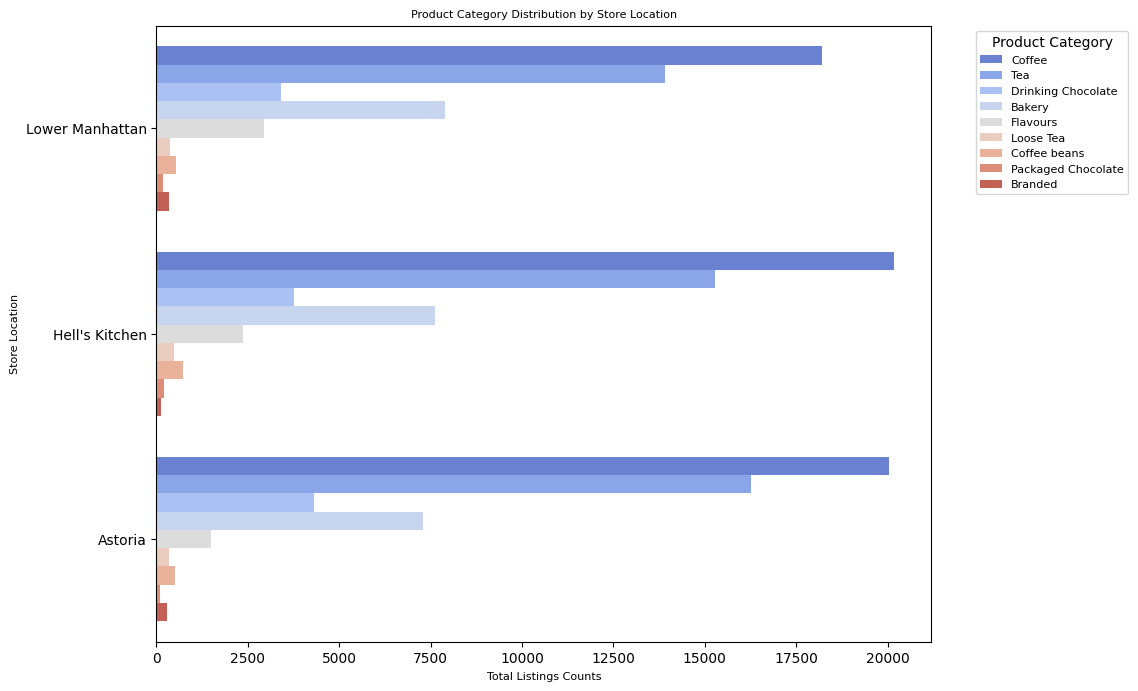

In [ ]:
# Group by 'store_location' and 'product_category', then calculate the count of listings
store_category_counts = df.groupby(['store_location', 'product_category']).size().reset_index(name='counts')
print(store_category_counts)

# Create a horizontal bar plot of product category distribution by store location
plt.figure(figsize=(10, 8))
sns.countplot(y='store_location', hue='product_category', data=df, palette='coolwarm')
plt.title('Product Category Distribution by Store Location', fontsize=8)
plt.xlabel('Total Listings Counts', fontsize=8)
plt.ylabel('Store Location', fontsize=8)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

## Conclusion

1. Overall Performance
  - Total Orders: **149,116**
  - Total Quantity Sold: **214,470**
  - Total Revenue: **698,812.33 Dollars**
  - Average Order Value: **4.69 Dollars**

2. Peak sales occur between **6 AM** and **10 AM**, with the highest revenue at 10 AM. Sales decline significantly after **11 AM**.

3. Consistent sales throughout the week, peaking on **Monday and Friday**. **Weekend sales are lower compared to weekdays**.

4. **Weekdays** shows higher sales across all store locations.

5. **Large** is the most prominent category for product size, followed by **Regular** and **Small** sizes, while **Unknown** size records substantial revenue.

6. Notably high sales in the **"Unknown"** size category across all locations.

7. **Hell's Kitchen** is the top-performing location in terms of revenue, closely followed by **Astoria** and **Lower Manhattan**.

8. **Product Category: Coffee** emerges as the dominant product category, contributing significantly to overall revenue, followed by **Tea**, **Bakery**, and **Drinking Chocolate**.

9. **Coffee** remains at the top in all locations.

10. **Product Type**: **Barista Espresso** is a top-selling product, **Brewed Chai tea**, and **Hot chocolate**, indicating a preference for **hot beverages**.

11. **Product Detail**: **Ethiopia**, **Sustainably Grown Organic**, and **Jamaican Coffee River** as the top revenue-generating product details.

## Actionable Insights
- **Focus Marketing Efforts**: We should target promotions and marketing efforts during peak hours (6 AM - 10 AM) and early weekdays (Monday and Friday).

- **Inventory Management**: Ensuring sufficient inventory for top-selling products such as Barista Espresso and Brewed Chai Tea.

- **Weekend Sales**: Developing strategies to boost weekend sales, possibly through special weekend promotions or events.